In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load all datasets

job_postings = pd.read_csv('/Users/reecewu/Desktop/DAproject/LinkedinJobs_231013/job_postings.csv')
benefits = pd.read_csv('/Users/reecewu/Desktop/DAproject/LinkedinJobs_231013/benefits.csv')
company_industries = pd.read_csv('/Users/reecewu/Desktop/DAproject/LinkedinJobs_231013/company_industries.csv')
employee_counts = pd.read_csv('/Users/reecewu/Desktop/DAproject/LinkedinJobs_231013/employee_counts.csv')

In [4]:
# Check the number of unique values

unique_values = {
    'job_postings' : job_postings['job_id'].nunique(),
    'benefits' : benefits['job_id'].nunique(),
    'company_industries' : company_industries['company_id'].nunique(),
    'employee_counts' : employee_counts['company_id'].nunique()
}

unique_values

{'job_postings': 15886,
 'benefits': 5496,
 'company_industries': 6003,
 'employee_counts': 6030}

In [5]:
# Merge all datasets into one

jobs = pd.merge(job_postings, benefits, on = 'job_id', how = 'left')

companies = pd.merge(employee_counts, company_industries, on = 'company_id', how = 'left')

df_merge = pd.merge(jobs, companies, on = 'company_id', how = 'left')

df_merge.head()

,job_id,company_id,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,remote_allowed,formatted_experience_level,type,employee_count,follower_count,industry
0,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,Medical insurance,NaN,NaN,NaN
1,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,Vision insurance,NaN,NaN,NaN
2,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,Dental insurance,NaN,NaN,NaN
3,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,401(k),NaN,NaN,NaN
4,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,Paid maternity leave,NaN,NaN,NaN


In [6]:
# Identify missing data in df

missing_data = df_merge.isnull().sum()

missing_data

job_id                               0
company_id                         641
max_salary                    13682782
med_salary                    15278563
min_salary                    13682782
pay_period                     7708006
formatted_work_type                  0
location                             0
remote_allowed                16904506
formatted_experience_level     2859986
type                          14087554
employee_count                     641
follower_count                     641
industry                           688
dtype: int64

In [7]:
# Handling missing data

# For categorical columns
missing_data_cat = ['pay_period', 'formatted_experience_level', 'type']
for col in missing_data_cat:
    df_merge[col].fillna('Null', inplace = True)
    
# For numerical columns
missing_data_num = ['employee_count', 'follower_count', 'remote_allowed']
for col in missing_data_num:
    df_merge[col].fillna(0, inplace = True)

# For some columns with missing values, we'll address them when needed.

remaining_missing_data = df_merge.isnull().sum()
remaining_missing_data

job_id                               0
company_id                         641
max_salary                    13682782
med_salary                    15278563
min_salary                    13682782
pay_period                           0
formatted_work_type                  0
location                             0
remote_allowed                       0
formatted_experience_level           0
type                                 0
employee_count                       0
follower_count                       0
industry                           688
dtype: int64

In [8]:
# Remove duplicate rows
df = df_merge.drop_duplicates()

#Shape of cleaned data
df.shape

(102101, 14)

In [9]:
# Data cleaned

df.reset_index(drop = True)

,job_id,company_id,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,remote_allowed,formatted_experience_level,type,employee_count,follower_count,industry
0,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",0.0,Null,Medical insurance,0.0,0.0,NaN
1,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",0.0,Null,Vision insurance,0.0,0.0,NaN
2,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",0.0,Null,Dental insurance,0.0,0.0,NaN
3,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",0.0,Null,401(k),0.0,0.0,NaN
4,85008768,NaN,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",0.0,Null,Paid maternity leave,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102096,3701373527,84659.0,NaN,NaN,NaN,Null,Full-time,"Vicksburg, MS",0.0,Null,Medical insurance,676.0,2982.0,Hospital & Health Care
102097,3701373527,84659.0,NaN,NaN,NaN,Null,Full-time,"Vicksburg, MS",0.0,Null,Vision insurance,676.0,2982.0,Hospital & Health Care
102098,3701373527,84659.0,NaN,NaN,NaN,Null,Full-time,"Vicksburg, MS",0.0,Null,Dental insurance,676.0,2982.0,Hospital & Health Care
102099,3701373527,84659.0,NaN,NaN,NaN,Null,Full-time,"Vicksburg, MS",0.0,Null,401(k),676.0,2982.0,Hospital & Health Care


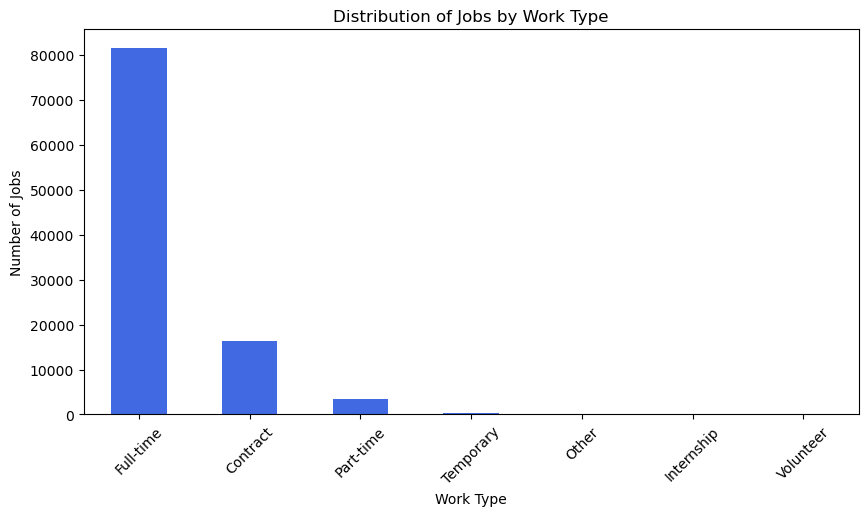

In [10]:
# Distribution of jobs by work type
work_type = df['formatted_work_type'].value_counts()

plt.figure(figsize = (10, 5))
work_type.plot(kind = 'bar', color = 'royalblue')
plt.title('Distribution of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation = 45)
plt.show()

### Observation
+ **Full-time** positions dominant the job positions.
+ **Contract** and **Part-time** positions are relatively few and occupy second and third.

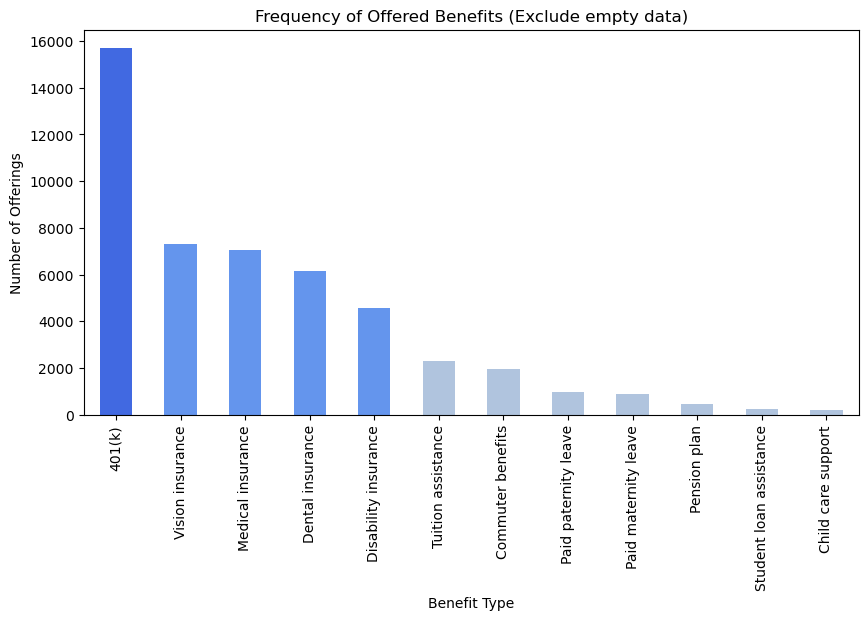

In [11]:
# The frequency of offered benefits
benefits = df[df['type'] != 'Null']['type'].value_counts()

plt.figure(figsize = (10, 5))
benefits.plot(kind = 'bar', color = ['royalblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue'])
plt.title('Frequency of Offered Benefits (Exclude empty data)')
plt.xlabel('Benefit Type')
plt.ylabel('Number of Offerings')
plt.xticks(rotation = 90)
plt.show()

### Observation
+ **401(K)** benefits account for the highest proportion, which means that people are concerned about the security of their retirement plan.
+ Second, various **insurance** programs including vision, medical, dental and disability account for similar amounts.


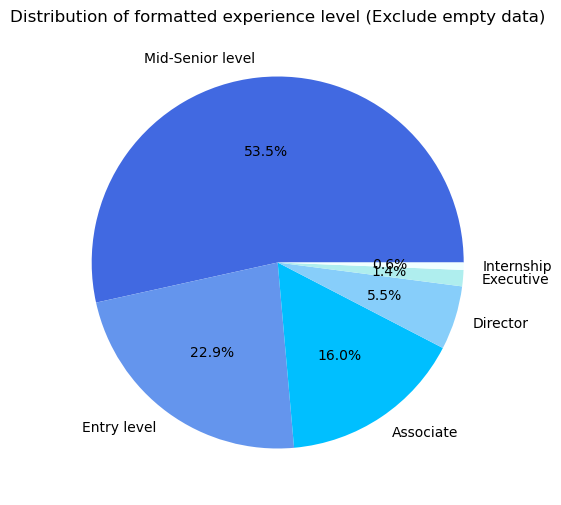

In [12]:
# Distribution of formatted experience level
experience_level = df[df['formatted_experience_level'] != 'Null']['formatted_experience_level'].value_counts()

plt.figure(figsize =(6, 8))
experience_level.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 0, colors = ['royalblue', 'cornflowerblue', 'deepskyblue', 'lightskyblue', 'paleturquoise', 'azure'])
plt.title('Distribution of formatted experience level (Exclude empty data)')
plt.ylabel(' ')
plt.show()

### Observation
+ The **Mid-Senior level** are in greater demand compared to the **Entry level**. This can be a challenge for the newbies who enter the workforce.
+ The demand for **High level** (Executive and Director) positions is relatively low, which reasonably reflects the distribution of the overall job amount.

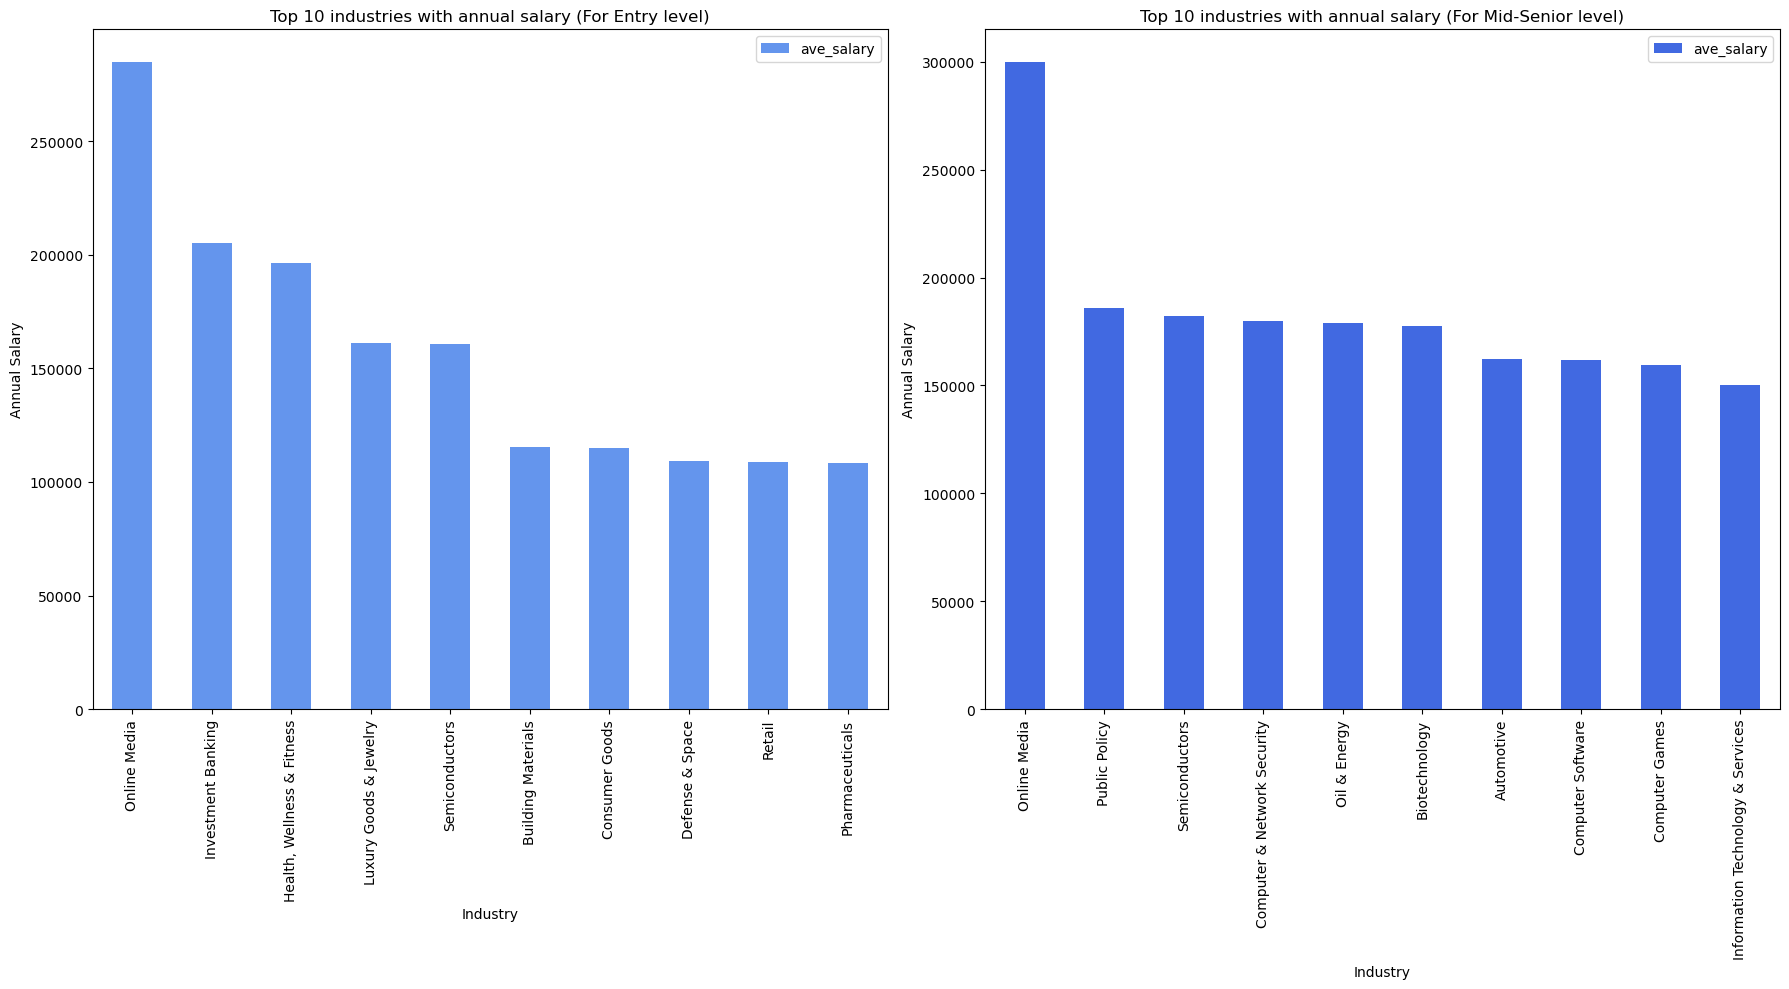

In [35]:
### Top 10 industries with annual salary
### Focus on Yearly payment / Full-time job / Entry or Mid-senior level
# ave_salary = (max_salary + min_salary) / 2

# Entry level
df_entry_pay = df[(df['pay_period'] == 'YEARLY') & (df['formatted_work_type'] == 'Full-time') & (df['formatted_experience_level'] == 'Entry level')]
df_entry_pay = df_entry_pay.copy()
df_entry_pay['ave_salary'] = (df_entry_pay['max_salary'] + df_entry_pay['min_salary']) / 2
df_ave_entry = df_entry_pay[['industry', 'ave_salary']].dropna()
df_ave_entry = df_ave_entry[df_ave_entry['industry'] != 'Null']
df_ave_entry = df_ave_entry.groupby(['industry'])['ave_salary'].mean().reset_index().sort_values(by = ['ave_salary'], ascending = False).head(10)

# Mid-Senior level
df_senior_pay = df[(df['pay_period'] == 'YEARLY') & (df['formatted_work_type'] == 'Full-time') & (df['formatted_experience_level'] == 'Mid-Senior level')]
df_senior_pay = df_senior_pay.copy()
df_senior_pay['ave_salary'] = (df_senior_pay['max_salary'] + df_senior_pay['min_salary']) / 2
df_ave_senior = df_senior_pay[['industry', 'ave_salary']].dropna()
df_ave_senior = df_ave_senior[df_ave_senior['industry'] != 'Null']
df_ave_senior = df_ave_senior.groupby(['industry'])['ave_salary'].mean().reset_index().sort_values(by = ['ave_salary'], ascending = False).head(10)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 10))

# Entry level_plotting
df_ave_entry.plot(x = 'industry', kind = 'bar', color = 'cornflowerblue', ax = ax1)
ax1.set_title('Top 10 industries with annual salary (For Entry level)')
ax1.set_xlabel('Industry')
ax1.set_ylabel('Annual Salary')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)

# Mid-Senior_plotting
df_ave_senior.plot(x = 'industry', kind = 'bar', color = 'royalblue', ax = ax2)
ax2.set_title('Top 10 industries with annual salary (For Mid-Senior level)')
ax2.set_xlabel('Industry')
ax2.set_ylabel('Annual Salary')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)


plt.tight_layout()
plt.show()

### Observation

+ **Online Media** dominant the Top 1 in both position.
+ There are many **technology-type industries** ranked in the Top 10, such as Semiconductors, Biotechnology and and Computer Software etc.

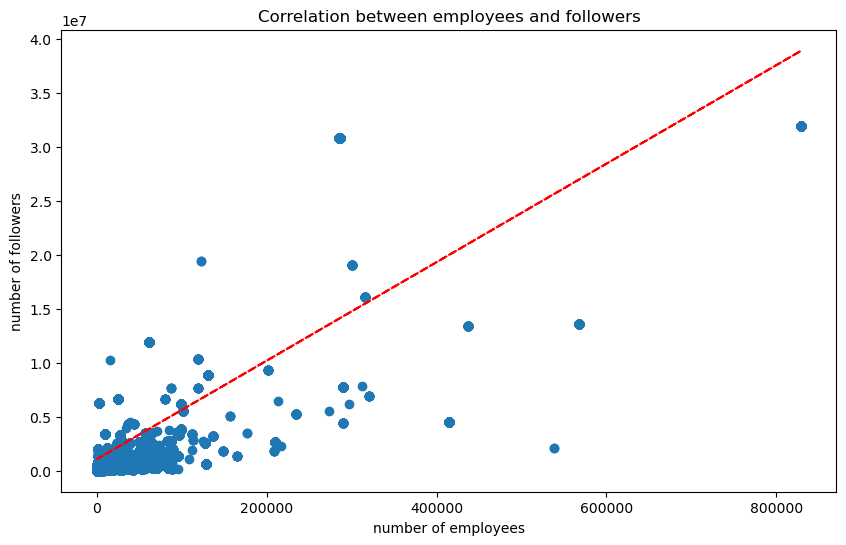

In [31]:
# Correlation between number of employees and number of followers

plt.figure(figsize =(10, 6))
plt.scatter(x = df['employee_count'], y = df['follower_count'])
plt.title('Correlation between employees and followers')
plt.xlabel('number of employees')
plt.ylabel('number of followers')
z = np.polyfit(df['employee_count'], df['follower_count'], 1)
p = np.poly1d(z)
plt.plot(df['employee_count'],p(df['employee_count']),"r--")
plt.show()


### Observation

+ The trend line shows the positive correlation of employees and followers.

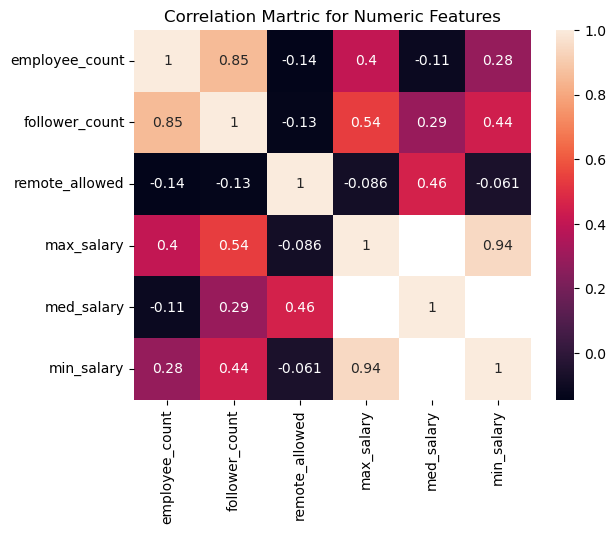

In [32]:
df_correlation = df[['employee_count', 'follower_count', 'remote_allowed', 'max_salary','med_salary', 'min_salary']]

correlation_matrix = df_correlation.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Martric for Numeric Features')

plt.show()